<html>
<h1 style="text-align:center;color:red;background-color:powderblue;font-size:500%">Flight Fare Prediction</h1>
</html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>Data Set Information:</b><br><br>
    Nowdays airline tickets can vary dynmically and significantly  for the same flight.
    customers are seeking to get the lowest prices for their flights. so here we introduces our model to save money for 
    customers by predicting the flights fares taking various features into considerations such as flight time, destination,
    source, dep time , arrival time etc..<br><br>
    <b>Attribute Information:</b><br>
    🔶Airline : names of airline companies<br>
🔶Date_of_Journey - day/month/year<br>
🔶Source - city from where journey starts<br>
🔶Destination - journey ending city<br>
🔶Route - way or direction of flight<br>
🔶Dep_Time - the time when a flight leaves the gate(hour:minute)<br>
🔶Arrival_Time - the time when a flight arrives the gate(hour:minute)<br>
🔶Duration - hour:minute<br>
🔶Total_Stops - number of stops<br>
🔶Additional_Info - extra information<br>
🔶Price - fare of a flight</p>

## Data Manipulation <a class="anchor" id="sec1"></a>

## Importing libraries

<html>
<img src="https://newrelic.com/sites/default/files/wp_blog_inline_files/shutterstock_1352528811.jpg" alt="Computer man" style="width:150px;height:100px;"/>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns',None) #displays max number of cols

## Importing dataset 

In [3]:
train_data=pd.read_excel("Data_Train.xlsx")

## Dataset View 

In [4]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Dataset Information 

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Here we can observe different datatypes like int64,object</p>
</html>

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.shape

(10683, 11)

## Summary Statistics 

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    *<b>Measures of Frequency</b>              :- Count, Percent, Frequency.<br>
    *<b>Measures of Central Tendency</b>       :- Mean, Median, and Mode.<br>
    *<b>Measures of Dispersion or Variation</b>:- Range(min,max),Variance, Standard Deviation.<br>
    *<b>Measures of Position</b>               :- Percentile Ranks, Quartile Ranks.</p>
</html>

In [8]:
train_data.describe().style.background_gradient()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Checking for unique values in all attribute 

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Different numbers of distint values in each column. Our target varibale is Price.</p>
</html>

In [9]:
train_data.nunique().sort_values(ascending=True)

Source                5
Total_Stops           5
Destination           6
Additional_Info      10
Airline              12
Date_of_Journey      44
Route               128
Dep_Time            222
Duration            368
Arrival_Time       1343
Price              1870
dtype: int64

## Checking for missing values in each column 

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">No such missing values in our dataset.<br>
If you want to learn how to treat the missing values.Go through this link
<a href="https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/">CLICK HERE</a></p>
</html>

<AxesSubplot:>

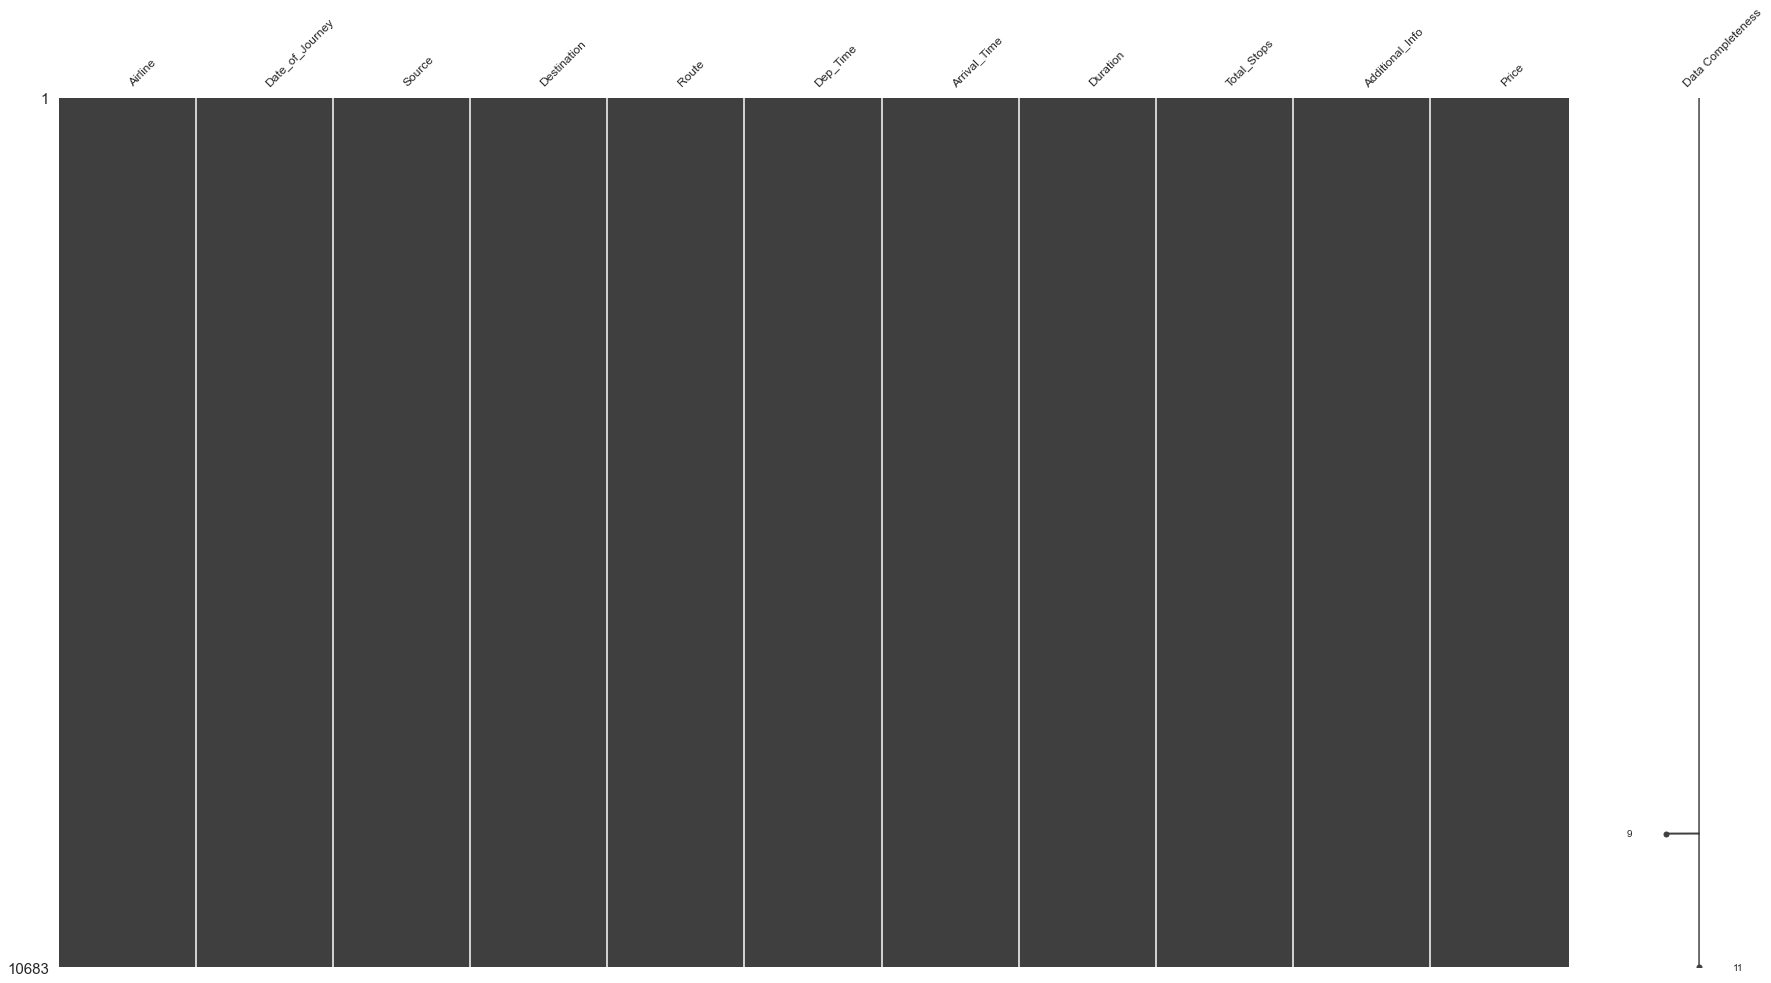

In [10]:
!pip install missingno
import missingno as msno
msno.matrix(train_data,labels=[train_data.columns],figsize=(30,16),fontsize=12)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.dropna(inplace= True)    #dropping Nan values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Analysing Categorical Variables

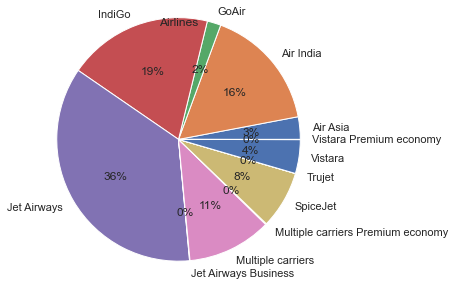

In [13]:
Airline_var=pd.crosstab(index=train_data['Airline'],columns='% observations')
plt.pie(Airline_var['% observations'],labels=Airline_var['% observations'].index,autopct='%.0f%%',radius=1.4)
plt.title('Airlines')
plt.show()

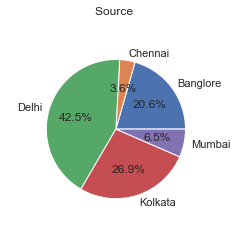

In [14]:
Source_var=pd.crosstab(index=train_data['Source'],columns='% observations')
plt.pie(Source_var['% observations'],labels=Source_var['% observations'].index,autopct='%1.1f%%',radius=0.8)
plt.title('Source ')
plt.show()

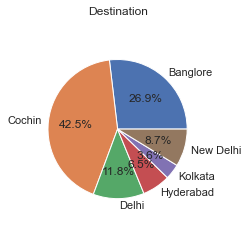

In [15]:
Destination_var=pd.crosstab(index=train_data['Destination'],columns='% observations')
plt.pie(Destination_var['% observations'],labels=Destination_var['% observations'].index,autopct='%1.1f%%',radius=0.8)
plt.title('Destination')
plt.show()

# EDA


<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">From description we can see that Date_of_Journey is a object data type,
*<b>Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction<b>
*<b>For this we require pandas to_datetime to convert object data type to datetime dtype<b>
*<b>.dt.day method will extract only day of that date<b>
*<b>.dt.month method will extract only month of that date</p>
</html>

In [16]:
#here date and time is of string so to use them we will convert them into date time type and use to_datetime()
# .dt.date method will extract only date 
# .dt.month will extract the month

train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month
#train_data["Journey_year"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.year

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
#similarly we will extract minute and seconds from dep_time()
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# Similar to Date_of_Journey we can extract values from dt.hour() and dt.min()

train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [24]:
#droping Duration 
train_data.drop(["Duration"], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">One can find many ways to handle categorical data. Some of them categorical data are,
*<b>Nominal data --> data are not in any order --> OneHotEncoder is used in this case <b>
*<b> Ordinal data --> data are in order --> LabelEncoder is used in this case<b></p>
</html>

In [25]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

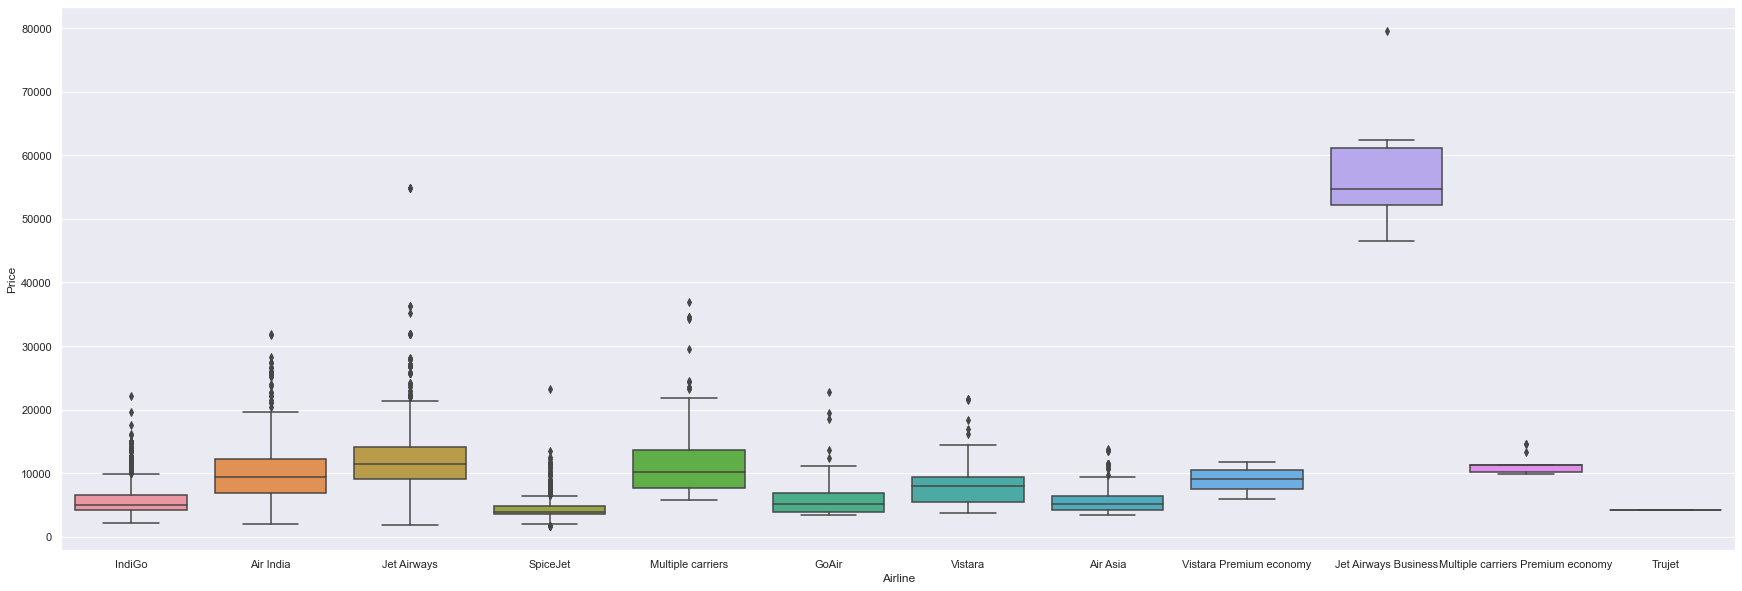

In [26]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.set(rc={"figure.figsize":(30,10)})
sns.boxplot(y =train_data["Price"], x = train_data["Airline"])
plt.show()
#Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline 
#and we can conclude that Jet Airways has the most outliers in terms of price.

In [27]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

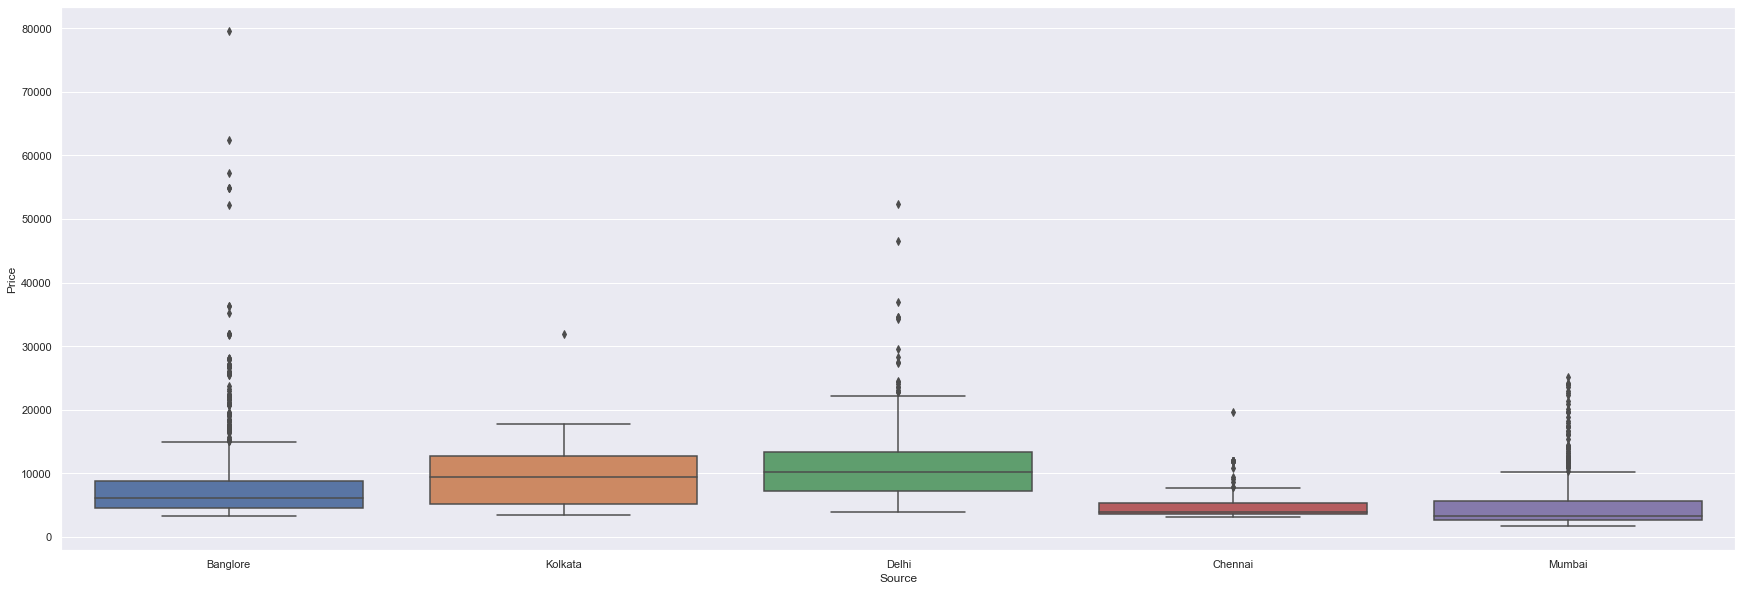

In [29]:
# Source vs Price

sns.set(rc={"figure.figsize":(30,10)})
sns.boxplot(y = train_data["Price"], x = train_data["Source"])
plt.show()

In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
train_data["Route"]
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other so drop Route and use Total_stops

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True) #dropping column of missing values since it is of no use
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [36]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

train_data1 = pd.concat([train_data, Airline, Source, Destination], axis = 1)  #concatenating column-wise
train_data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
train_data1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
train_data1.shape

(10682, 30)

## Checking the data distribution of each variable  <a class="anchor" id="sec2.2"></a>

   </p>
</html><html>
<p style="color:chocolate;font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution

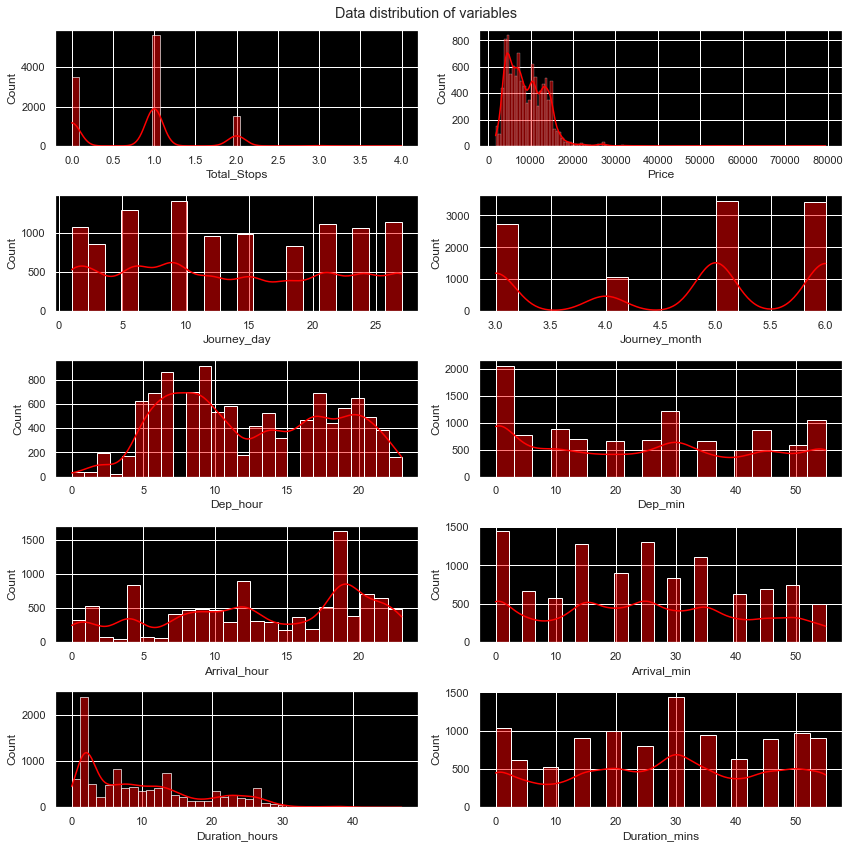

In [39]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(train_data1.select_dtypes(include=['float','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=train_data1, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of variables')
plt.tight_layout()

# Box plot(Outliers Detection)

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Box Plot-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Box Plot?</b><br>
    <img src="https://lh5.googleusercontent.com/Wz6lRE49LVUVq18MyNj6pEwDgdVcHhyDqaG5yGMQX36hy3ZGSyH7fs4A4nbJojGR58k=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.</p><br>
    <p style="border:4px solid violet;color:teal;background-color:tan;">
        <b>How to interpret boxplot</b><br>
    *Median: In the box plot, the median is displayed rather than the mean.<br>
    * Q1: The first quartile (25%) position.<br>
  * Q3: The third quartile (75%) position.<br>
  *  Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.<br>
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.<br>
  *  Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

</p>
</html>

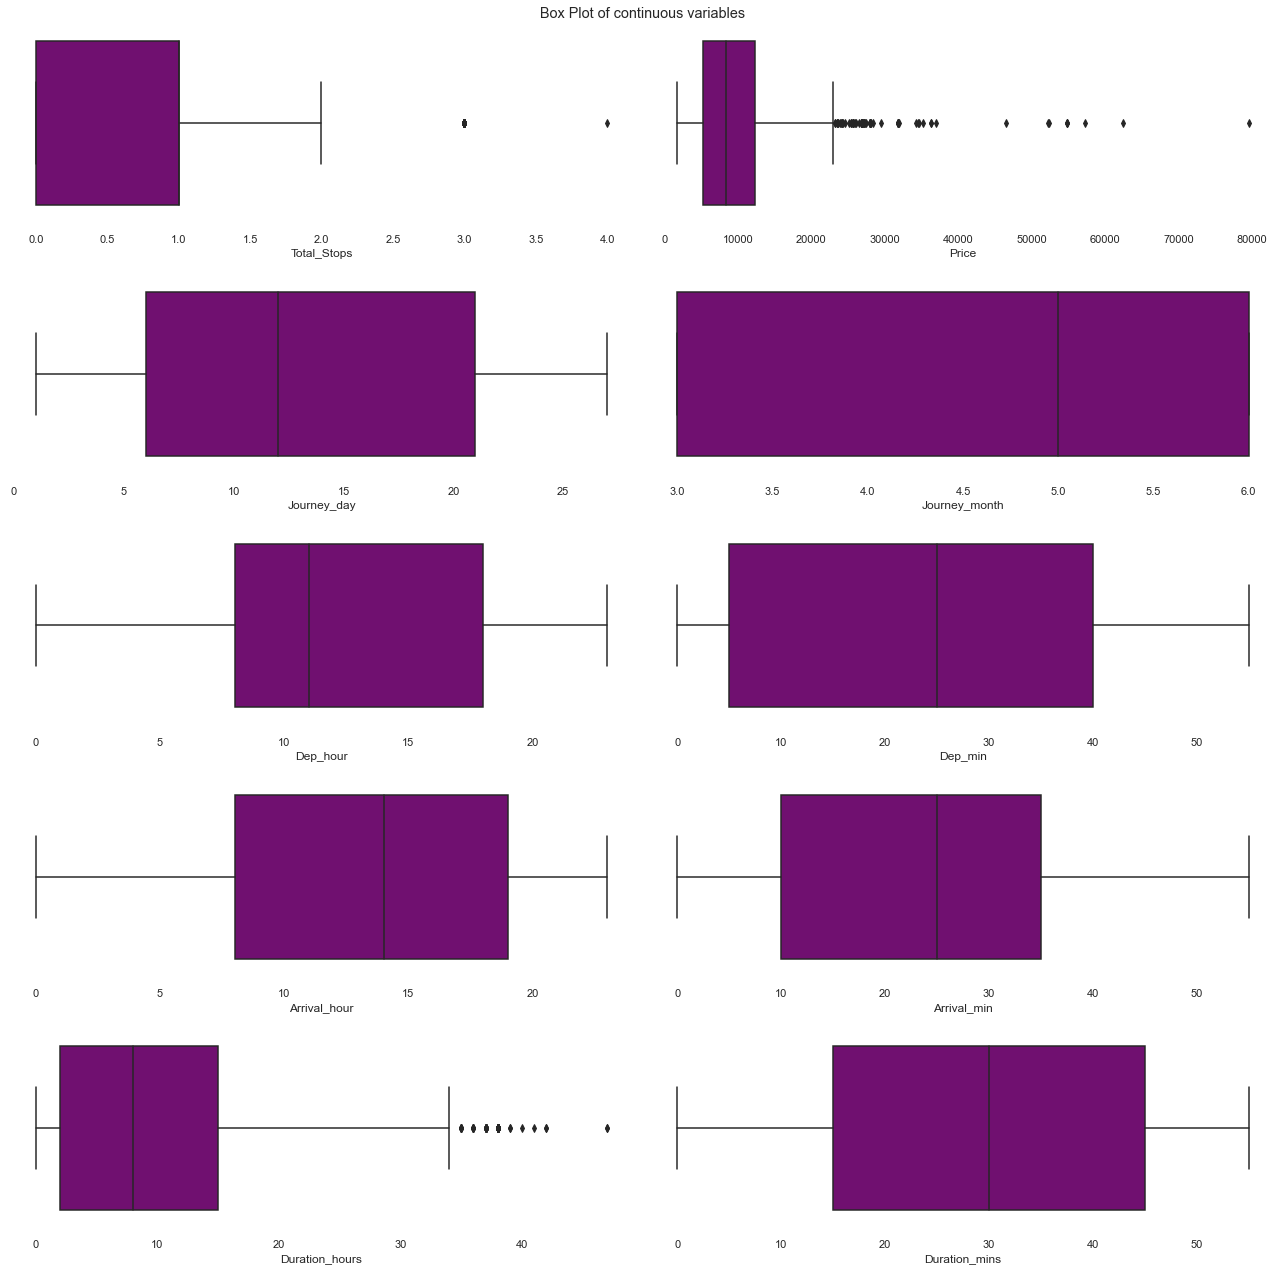

In [40]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(train_data1.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'White'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=train_data1, x=col, ax=ax,color='Purple')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

## Data distribution after applying Power Transformer 

In [41]:
#selecting variables that have data types float and int.
var=list(train_data1.select_dtypes(include=['float64','int64']).columns)
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
train_data1[var]=sc_X.fit_transform(train_data1[var])

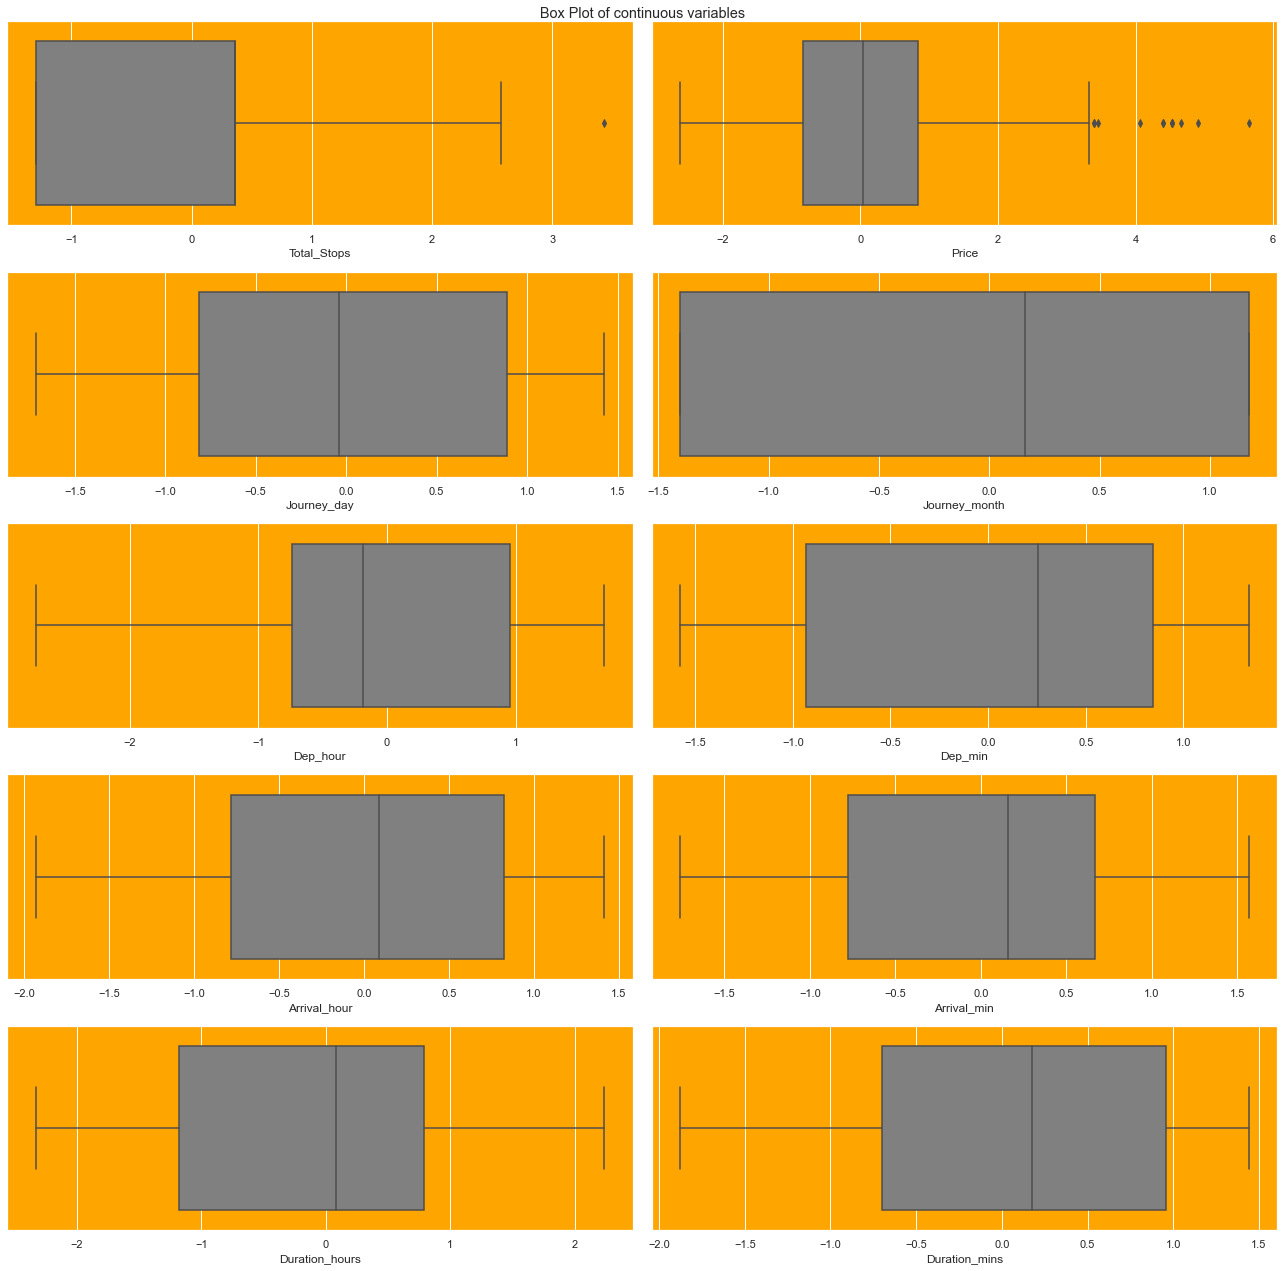

In [42]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(train_data1.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'Orange'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=train_data1, x=col, ax=ax,color='Grey')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

# Feature Selection
<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Selection-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..</p>
<img src="https://lh6.googleusercontent.com/exNj6JGWZNAzyB8XXd1LM5FrgMGbfyV09Qgts5bPJA14O7-8AqATF9suuWqYo6oYhOk=w2400" alt="Computer man" style="width:800px;height:300px;"/>
 </html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    In our dataset we have numerical Input variable and numerical Output variable.so we will use <b>correlation</b> for the feature selection.</p>

In [43]:
train_data1.shape

(10682, 30)

In [44]:
train_data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
X = train_data1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.297820,1.164296,-1.401748,1.545888,0.023186,-1.790733,-0.776578,-1.175643,1.200413,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.574617,-1.716424,0.161418,-1.356237,1.179354,-0.056006,-0.433010,-0.055254,-0.099976,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.574617,-0.405463,1.175096,-0.548198,0.255935,-1.362584,0.156840,1.074715,-1.877928,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.358782,-0.041621,0.161418,0.956329,-0.933677,1.413910,0.420855,-0.393117,-0.099976,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.358782,-1.716424,-1.401748,0.646652,1.179354,1.118899,0.670321,-0.603213,0.955571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
y = train_data1.iloc[:, 1]
y.head()

0   -1.367854
1   -0.138984
2    1.086164
3   -0.536300
4    0.993291
Name: Price, dtype: float64

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000002C0BC33FC10>)

In [48]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

In [49]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')


Total_Stops : 29.16%
Journey_day : 0.50%
Journey_month : 0.10%
Dep_hour : 0.00%
Dep_min : 0.15%
Arrival_hour : 0.08%
Arrival_min : 0.33%
Duration_hours : 28.19%
Duration_mins : 0.63%
Airline_Air India : 0.17%
Airline_GoAir : 0.31%
Airline_IndiGo : 5.24%
Airline_Jet Airways : 7.24%
Airline_Jet Airways Business : 0.36%
Airline_Multiple carriers : 0.89%
Airline_Multiple carriers Premium economy : 0.02%
Airline_SpiceJet : 4.62%
Airline_Trujet : 0.00%
Airline_Vistara : 0.06%
Airline_Vistara Premium economy : 0.00%
Source_Chennai : 1.40%
Source_Delhi : 3.83%
Source_Kolkata : 0.04%
Source_Mumbai : 3.43%
Destination_Cochin : 3.83%
Destination_Delhi : 3.83%
Destination_Hyderabad : 3.43%
Destination_Kolkata : 1.40%
Destination_New Delhi : 0.76%


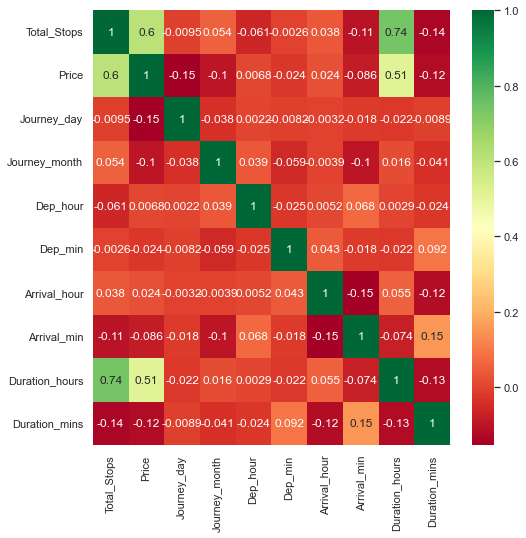

In [135]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (8,8))
sns.heatmap(train_data.corr(),annot = True, cmap = "RdYlGn")

plt.show()

In [51]:
# Important feature selection using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

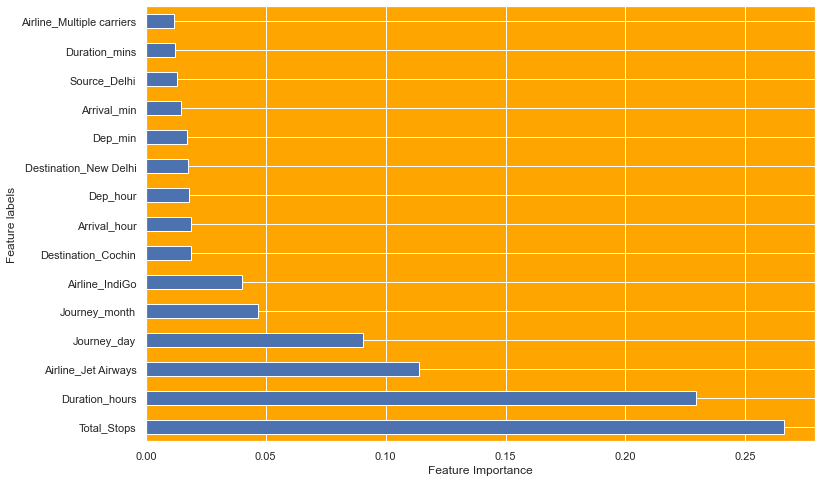

In [52]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.ylabel("Feature labels")
plt.xlabel("Feature Importance")
plt.show()

In [53]:
X1 = train_data1.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_IndiGo',
       'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Source_Delhi',
       'Destination_Cochin', 'Destination_New Delhi']]
X1.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Source_Delhi,Destination_Cochin,Destination_New Delhi
0,-1.297820,1.164296,-1.401748,1.545888,0.023186,-1.790733,-0.776578,-1.175643,1.200413,1,0,0,0,0,1
1,1.574617,-1.716424,0.161418,-1.356237,1.179354,-0.056006,-0.433010,-0.055254,-0.099976,0,0,0,0,0,0
2,1.574617,-0.405463,1.175096,-0.548198,0.255935,-1.362584,0.156840,1.074715,-1.877928,0,1,0,1,1,0
3,0.358782,-0.041621,0.161418,0.956329,-0.933677,1.413910,0.420855,-0.393117,-0.099976,1,0,0,0,0,0
4,0.358782,-1.716424,-1.401748,0.646652,1.179354,1.118899,0.670321,-0.603213,0.955571,1,0,0,0,0,1


### Splitting our dataset into train and test set <a class="anchor" id="sec4"></a>

In [54]:
#splitting our dataset in 80% training and 20% testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

### Feature Scaling <a class="anchor" id="sec5"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Scaling-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    <img src="https://lh3.googleusercontent.com/q9a09LIGXoRO_1bdgFw0C3WcjyEhpDnJ3C8COL65yn0gWhRTtFm5US-Q33aAQujuETQ=w2400" alt="Computer man" style="width:800px;height:200px;"/>
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
        <img src="https://lh6.googleusercontent.com/_y4dtry_8ImYjqLTXcH68ZpB1--Iea2n2m08d-GLpbTQ4VSREwy3v1PcX8dGQwLE9PE=w2400" alt="Computer man" style="width:800px;height:200px;"/></p>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Here we are going to use <b>Standardization</b>.</p>
    </html>

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Checking linearity assumption

In [108]:
def calculate_residuals(model, features, label):
# Creates predictions on the features with the model and calculates residuals
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [109]:
def linear_assumption(model, features, label):
# Linearity: Assumes that there is a linear relationship between the predictors and the response variable. 
#If not, either a quadratic term or another algorithm should be used.
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\Bindunalli\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


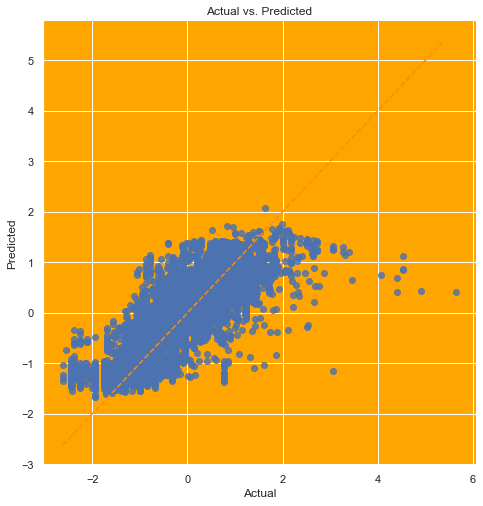

In [110]:
linear_assumption(model,X_train,y_train)

# normality assumption

In [111]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
#Normality: Assumes that the error terms are normally distributed. 
#If they are not,nonlinear transformations of variables may solve this.
#This assumption being violated primarily causes issues with the confidence intervals
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Bindunalli\anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
C:\Users\Bindunalli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


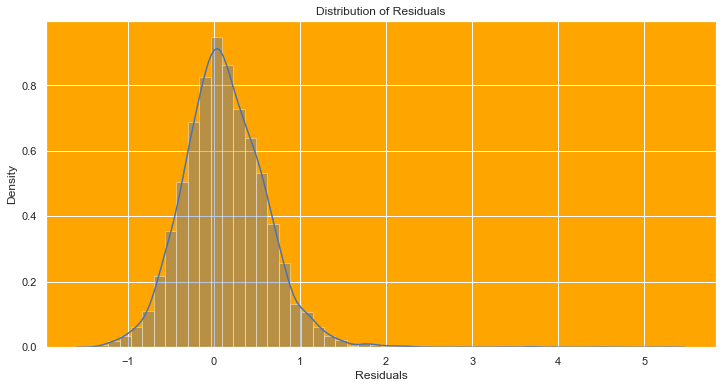


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [112]:
normal_errors_assumption(model,X_train,y_train)

# multicollinearity assumption

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [114]:
calc_vif(X.select_dtypes(include=['float','int64']))

,variables,VIF
0,Total_Stops,3.651543
1,Journey_day,1.002697
2,Journey_month,1.022830
3,Dep_hour,1.018446
4,Dep_min,1.021049
5,Arrival_hour,1.055272
6,Arrival_min,1.089885
7,Duration_hours,3.676177
8,Duration_mins,1.077575


# autocorrelation assumption

In [115]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [116]:
 autocorrelation_assumption(model,X_train,y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8648161000948664
Little to no autocorrelation 

Assumption satisfied


# Homoscedasticity assumption

In [117]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


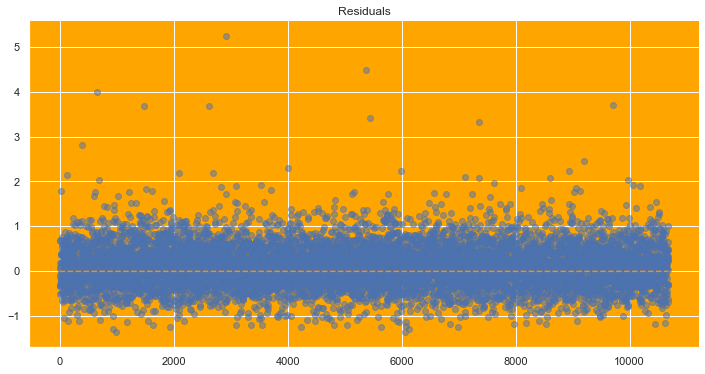

In [118]:
homoscedasticity_assumption(model,X_train,y_train)

# Fitting model

<p style="border:4px solid violet;color:teal;background-color:tan;">
        <b>Fitting model</b><br>
    *1. Split dataset into train and test set in order to prediction w.r.t X_test<br>
    *2.If needed do scaling of data<br>
  *3.Scaling is not done in Random forest<br>
  *4.Import model<br>
*5.Fit the data <br>
  *6.Predict w.r.t X_test<br>
    *7.In regression check RSME Score<br>
    *8.Plot graph
    

</p>
</html>

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels

In [106]:
import statsmodels.api as sm
lr=sm.OLS(y_train,X_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              1258.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:12:24   Log-Likelihood:                         -7309.1
No. Observations:                8545   AIC:                                  1.465e+04
Df Residuals:                    8531   BIC:                                  1.474e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Linear Regression

In [99]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [100]:
model.score(X_test, y_test)

0.6703584303854413

In [101]:
model.score(X_train, y_train)

0.6736944110204152

In [102]:
metrics.r2_score(y_test, y_pred)

0.6703584303854413

# Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [93]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
r2_score(y_test, y_pred)

0.7664030478371867

# Decision Tree Regression model

In [84]:
# Training the Decision Tree Regression model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [85]:
# Predicting test set results
y_pred = regressor.predict(X_test)
print('Train Score:',regressor.score(X_train,y_train))
print('Test Score:',regressor.score(X_test,y_test))
print(y_pred,y_test)


Train Score: 0.9665981334665973
Test Score: 0.7733833234634827
[ 1.51647721 -0.94857957  0.05348141 ... -0.2659763   0.99931154
  1.15606124] 6075     1.491422
3544    -0.948580
9291     0.220000
5032    -1.384920
2483     0.926663
           ...   
9797    -0.204246
9871    -1.073097
10063   -0.192814
8802     0.139151
8617     1.128185
Name: Price, Length: 2137, dtype: float64


In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7733833234634827

## RANDOM FOREST (linearity assumption is violated so random forest(non-linear data) is used).

In [119]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [120]:
reg_rf.score(X_train, y_train)

0.9560080995993531

In [121]:
reg_rf.score(X_test, y_test)

0.8516102557575542

In [122]:
metrics.r2_score(y_test, y_pred)

0.8516102557575542

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.25525202866722924
MSE: 0.15265991774433646
RMSE: 0.3907171838354905


C:\Users\Bindunalli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


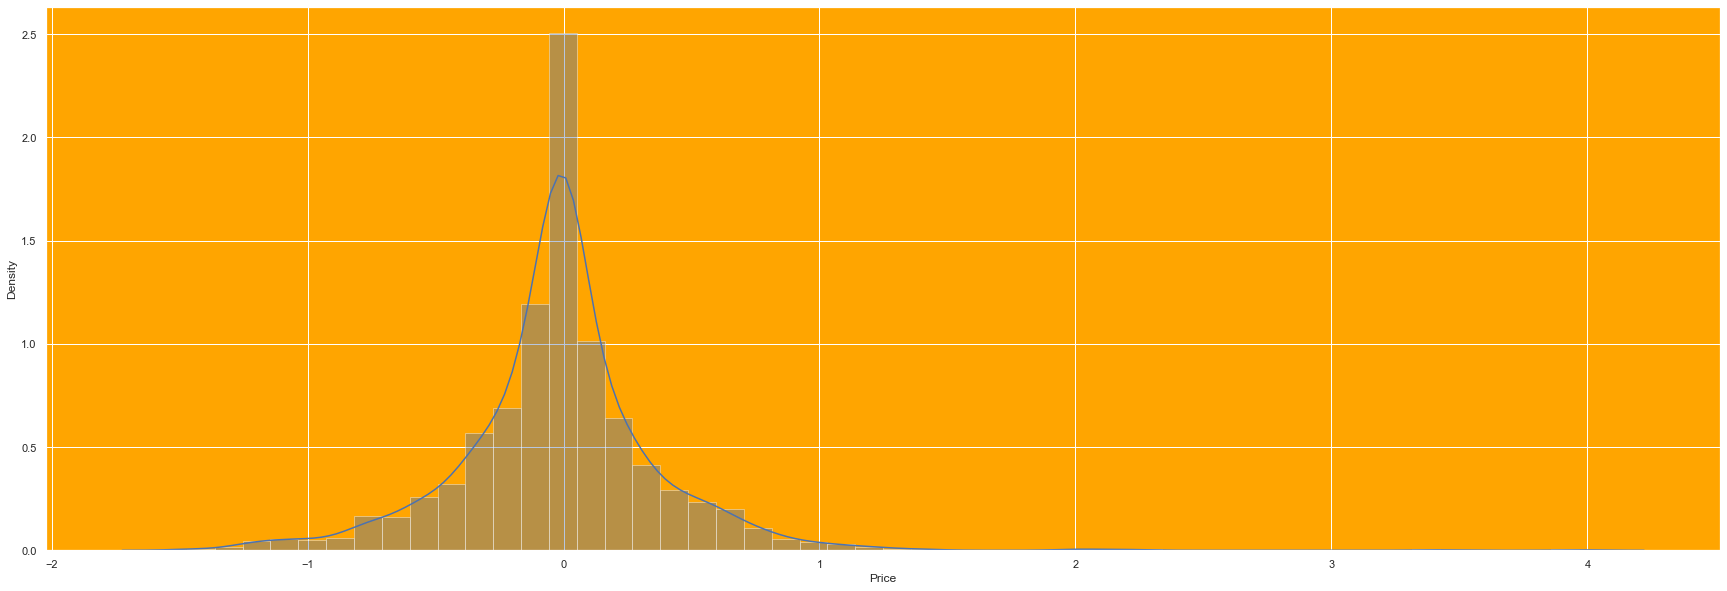

In [124]:
sns.distplot(y_test-y_pred)
plt.show()

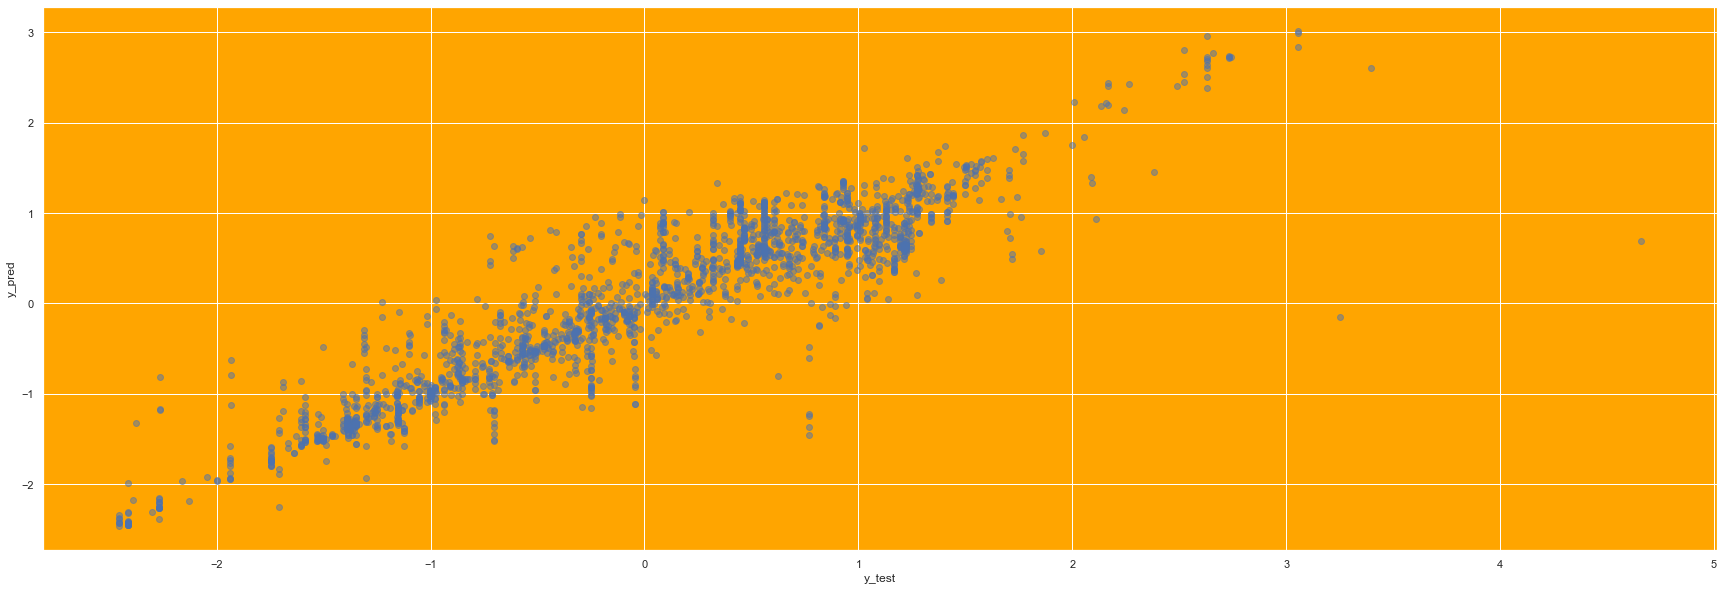

In [125]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Hyperparameter Tuning
1. Choose following method for hyperparameter tuning
2. RandomizedSearchCV --> Fast
3. GridSearchCV
4. Assign hyperparameters in form of dictionery
5. Fit the model
6. Check best paramters and best score

In [126]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [127]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [128]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2) 

In [129]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   7.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   8.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [131]:
prediction = rf_random.predict(X_test)

C:\Users\Bindunalli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


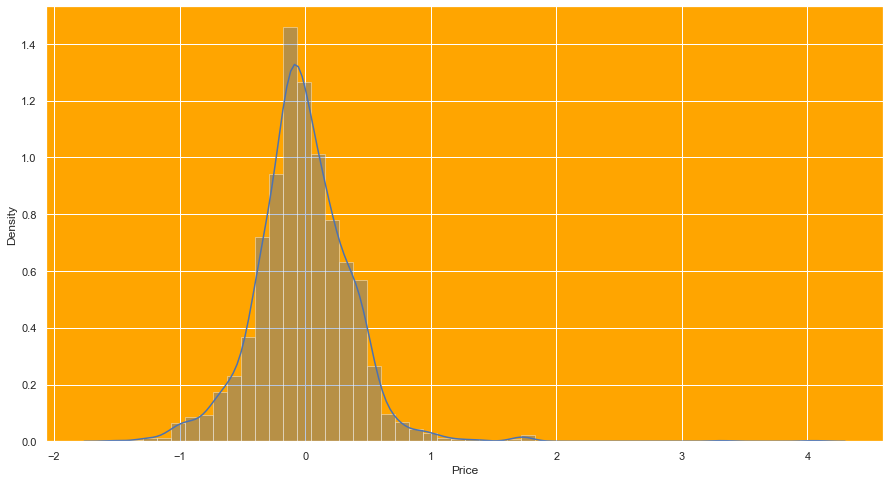

In [133]:
plt.figure(figsize = (15,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
metrics.r2_score(y_test,prediction)